In [1]:
import statistics
from scipy import stats
import pandas as pd

##### Vorspiel: Mittelwert berechnen

In [2]:
data = [1, 4, 5, 1, 2, 2, 2, 1]

In [3]:
# Per Hand: 
mean_per_hand = sum(data) / len(data)
print(mean_per_hand)

2.25


In [4]:
# Mit mean aus dem Modul statistics (Standardbibliothek):
mean_stat = statistics.mean(data)
print(mean_stat)

2.25


In [ ]:
# Hinweis: Auch numpy hat eine mean-Methode, ebenso Spalten eines Dataframes!

### Skalentypen

In [5]:
# Was für ein Skalentyp ist das?

# Nominalskala
favorite_technologies = ['Python', 'Power BI', 'Excel', 'Python', 'Python',
						 'SQL', 'Python', 'Python', 'Power BI', 'SQL']

In [6]:
# Wie oft kommt jedes Element vor? (Schritt 1)
[favorite_technologies.count(tech) for tech in favorite_technologies]

[5, 2, 1, 5, 5, 2, 5, 5, 2, 2]

In [7]:
# Mit Namen (Schritt 2)
[(tech, favorite_technologies.count(tech)) for tech in favorite_technologies]

[('Python', 5),
 ('Power BI', 2),
 ('Excel', 1),
 ('Python', 5),
 ('Python', 5),
 ('SQL', 2),
 ('Python', 5),
 ('Python', 5),
 ('Power BI', 2),
 ('SQL', 2)]

In [8]:
# Ohne Doppelungen (Schritt 3 - fertig):
[(tech, favorite_technologies.count(tech)) for tech in set(favorite_technologies)]

[('Excel', 1), ('Power BI', 2), ('Python', 5), ('SQL', 2)]

In [12]:
# Als Funktion:
def abs_freq(entities: list) -> list:
	abs_freqs = [(entity, entities.count(entity)) for entity in set(entities)]
	return abs_freqs

In [25]:
# Aufruf der Funktion:
abs_frequencies = abs_freq(favorite_technologies)
abs_frequencies

[('Excel', 1), ('Power BI', 2), ('Python', 5), ('SQL', 2)]

In [14]:
# Als Funktion:
def rel_freq(entities: list) -> list:
	rel_freqs = [(entity, entities.count(entity) / len(entities)) for entity in set(entities)]
	return rel_freqs

In [21]:
# Aufruf der Funktion:
rel_frequencies = rel_freq(favorite_technologies)
rel_frequencies

[('Excel', 0.1), ('Power BI', 0.2), ('Python', 0.5), ('SQL', 0.2)]

In [22]:
# Schöne Ausgabe in Prozent:
for tech, percentage in rel_frequencies:
	print(f'{tech}: {percentage:.2%}')

Excel: 10.00%
Power BI: 20.00%
Python: 50.00%
SQL: 20.00%


In [27]:
# Sollte in der Summe 1 ergeben (entspricht 100%):
sum([tup[1] for tup in rel_frequencies])

1.0

In [28]:
# Was ist das für eine Skala?

# Ordinalskala, es gibt eine Reihenfolge!
grades = ['gut', 'sehr schlecht', 'neutral', 'gut', 'gut', 'gut',
		  'sehr gut', 'gut', 'gut', 'sehr gut', 'sehr gut', 'gut',
		  'schlecht', 'neutral', 'sehr gut', 'gut', 'neutral', 'neutral', 'gut',
		  'sehr gut']

In [30]:
# Rechne die relativen Häufigkeiten der Werte aus:
rel_freq(grades)

[('gut', 0.45),
 ('neutral', 0.2),
 ('sehr gut', 0.25),
 ('sehr schlecht', 0.05),
 ('schlecht', 0.05)]

In [36]:
# Relative Häufigkeiten mit scipy:
stats.relfreq([1, 1, 2, 4], numbins=3)

RelfreqResult(frequency=array([0.5 , 0.25, 0.25]), lowerlimit=np.float64(0.25), binsize=np.float64(1.5), extrapoints=0)

In [37]:
# Damit wir einen Mittelwert ausrechnen können, müssen wir erst einmal die Strings
# zu Werten umwandeln:
grades_dict = {'sehr schlecht': 5, 'schlecht': 4, 'neutral': 3, 'gut': 2, 'sehr gut': 1}

In [38]:
grades_num = [grades_dict[grade] for grade in grades]
grades_num

[2, 5, 3, 2, 2, 2, 1, 2, 2, 1, 1, 2, 4, 3, 1, 2, 3, 3, 2, 1]

In [39]:
sum(grades_num) / len(grades_num)

2.2

In [40]:
# Relative Häufigkeit mit scipy:
print(stats.relfreq(grades_num, len(set(grades_num))))

RelfreqResult(frequency=array([0.25, 0.45, 0.2 , 0.05, 0.05]), lowerlimit=np.float64(0.5), binsize=np.float64(1.0), extrapoints=0)


In [41]:
# caluc_mean()
def calcu_mean(numb: list) -> list:
	c_mean = sum(numb) / len(numb)
	return c_mean

In [42]:
calcu_mean(grades_num)

2.2

# Dasselbe mit Pandasmitteln

In [43]:
grades_dict = {'grades': grades}

In [44]:
grades_df = pd.DataFrame.from_dict(grades_dict)
grades_df

,grades
0,gut
1,sehr schlecht
2,neutral
3,gut
4,gut
5,gut
6,sehr gut
7,gut
8,gut
9,sehr gut


In [47]:
# Numerische Werte hinzufügen mit map:
grades_mapping = {'sehr gut': 1, 'gut': 2, 'neutral': 3, 'schlecht': 4, 'sehr schlecht': 5}
grades_df['grades_num'] = grades_df['grades'].map(grades_mapping)

In [48]:
grades_df

,grades,grades_num
0,gut,2
1,sehr schlecht,5
2,neutral,3
3,gut,2
4,gut,2
5,gut,2
6,sehr gut,1
7,gut,2
8,gut,2
9,sehr gut,1


In [49]:
# Häufigkeiten von Bewertungen:
grades_distribution = grades_df.grades.value_counts() / len(grades_df)
print(grades_distribution)

grades
gut              0.45
sehr gut         0.25
neutral          0.20
sehr schlecht    0.05
schlecht         0.05
Name: count, dtype: float64


In [ ]:
# Ging das in Pandas nicht einfacher?


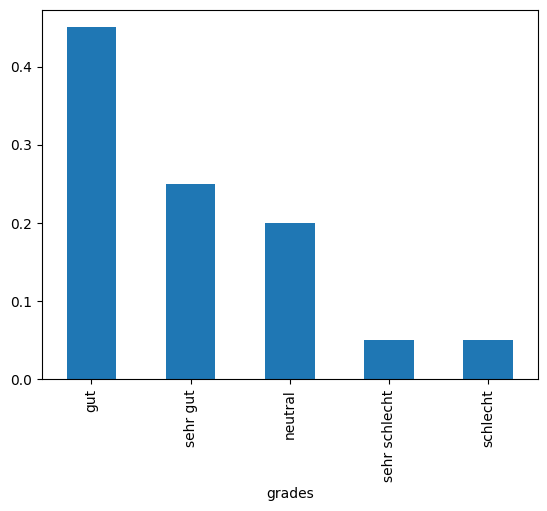

In [50]:
grades_distribution.plot(kind='bar');

In [51]:
grades_sorted = grades_distribution.reindex(['sehr schlecht', 'schlecht', 'neutral', 'gut', 'sehr gut'])
grades_sorted

grades
sehr schlecht    0.05
schlecht         0.05
neutral          0.20
gut              0.45
sehr gut         0.25
Name: count, dtype: float64

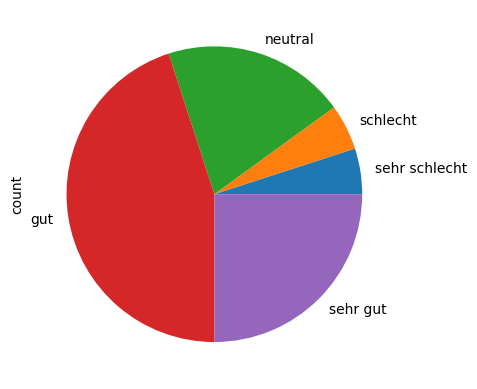

In [56]:
grades_sorted.plot(kind='pie');

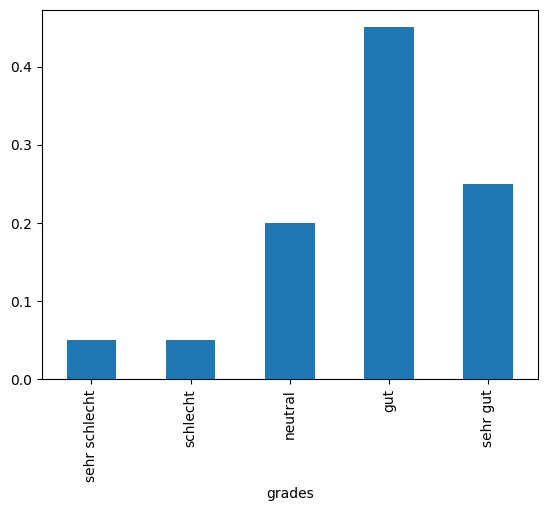

In [58]:
# Oder komplett aus Pandasmitteln mit method chaining:
grades_df['grades'].value_counts(normalize=True) \
	.reindex(['sehr schlecht', 'schlecht', 'neutral', 'gut', 'sehr gut']) \
	.plot(kind='bar');

In [57]:
# Was ist das für eine Skala?

# Intervallskala  -> siehe Skript!!!
celsius_temperatures = [20, 27, 10, 7, 11, -1, 0, -4]

In [59]:
# Was ist das für eine Skala?

# Verhältnisskala -> siehe Skript!!!
student_weigths = [72, 64.5, 85, 77, 68, 62]